In [1]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('C:/Users/Rahul Soni/Downloads/Screen Time Data.csv')

In [15]:
df

,index,Date,Week Day,Total Screen Time,Social Networking,Reading and Reference,Other,Productivity,Health and Fitness,Entertainment,Creativity,Yoga
0,0,04/17/19,Wednesday,187,89,17,41,22,0,0,0,0
1,1,04/18/19,Thursday,123,78,17,8,9,0,0,0,0
2,2,04/19/19,Friday,112,52,40,8,4,0,3,0,0
3,3,04/20/19,Saturday,101,69,9,38,2,0,3,0,0
4,4,04/21/19,Sunday,56,35,2,43,3,0,1,1,0
5,5,04/22/19,Monday,189,68,0,9,3,4,0,0,0
6,6,04/23/19,Tuesday,158,56,18,41,12,15,0,0,0
7,7,04/24/19,Wednesday,135,98,3,33,16,0,0,0,0
8,8,04/25/19,Thursday,52,25,7,3,16,0,0,0,0
9,9,04/26/19,Friday,198,76,8,29,15,0,32,0,0


In [17]:
df.isnull().sum()

index                    0
Date                     0
Week Day                 0
Total Screen Time        0
Social Networking        0
Reading and Reference    0
Other                    0
Productivity             0
Health and Fitness       0
Entertainment            0
Creativity               0
Yoga                     0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
from scipy.stats import shapiro

In [25]:
shapiro(df['Productivity'])

ShapiroResult(statistic=0.8922788988362809, pvalue=0.007579984646856594)

In [27]:
shapiro(df['Social Networking'])

ShapiroResult(statistic=0.9636623061539702, pvalue=0.424182859709911)

In [29]:
import seaborn as sb

<Axes: xlabel='Social Networking', ylabel='Count'>

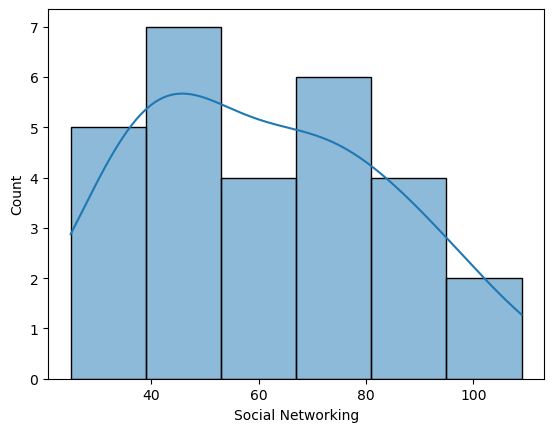

In [35]:
sb.histplot(df['Social Networking'], kde=True)

<Axes: xlabel='Productivity', ylabel='Count'>

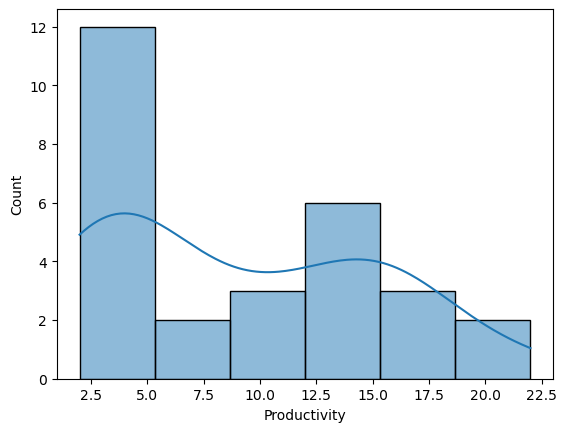

In [37]:
sb.histplot(df['Productivity'], kde=True)

In [39]:
import statsmodels.api as sm

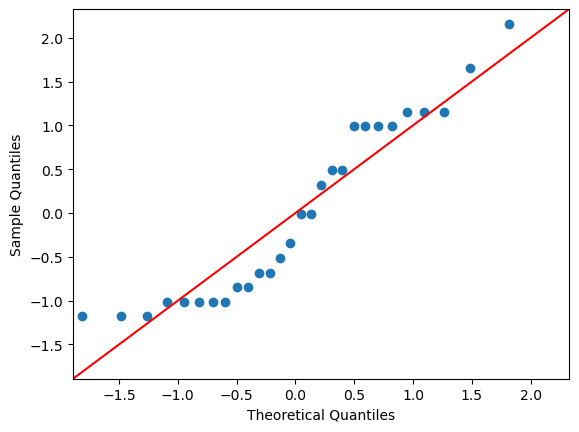

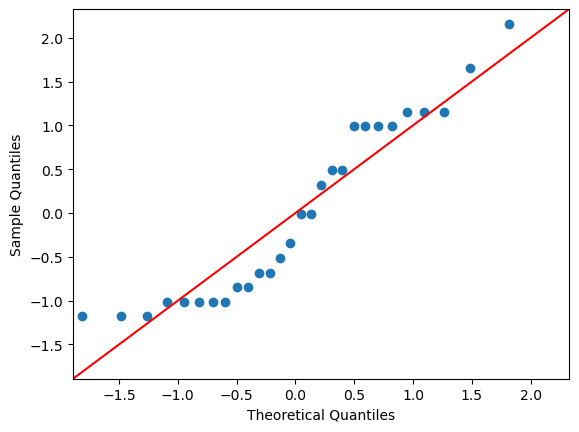

In [45]:
sm.qqplot(df['Productivity'], fit=True, line='45')

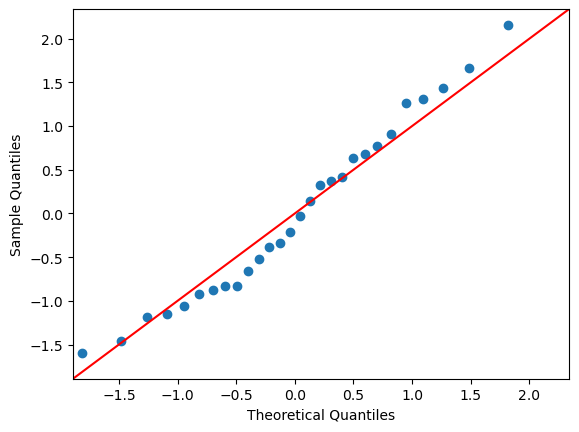

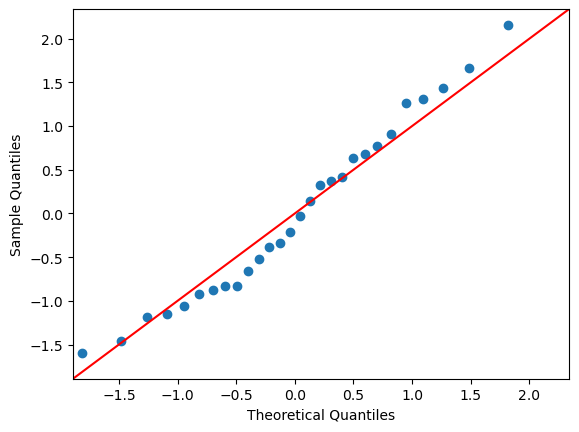

In [47]:
sm.qqplot(df['Social Networking'], line='45', fit=True)

In [49]:
from scipy.stats import normaltest

In [69]:
stats1, pval1 = normaltest(df['Productivity'])

In [77]:
alpha = 0.05

if pval1 > alpha:
    print("Sample looks Gaussian (H0 accepted)")
else:
    print("Sample doesn't looks Gaussian (H0 rejected")

Sample looks Gaussian (H0 accepted)


In [71]:
stats2, pval2 = normaltest(df['Social Networking'])

In [79]:
alpha = 0.05

if pval2 > alpha:
    print("Sample looks Gaussian (H0 accepted)")
else:
    print("Sample doesn't looks Gaussian (H0 rejected")

Sample looks Gaussian (H0 accepted)


In [55]:
from scipy.stats import anderson

In [65]:
result = anderson(df['Productivity'])

In [93]:
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print("Data looks normal (accept H0)")
    else:
        print("Data doesn't look normal (reject H0)")

Data doesn't look normal (reject H0)
Data doesn't look normal (reject H0)
Data doesn't look normal (reject H0)
Data doesn't look normal (reject H0)
Data doesn't look normal (reject H0)


In [89]:
result2 = anderson(df['Social Networking'])

In [95]:
for i in range(len(result2.critical_values)):
    sl, cv = result2.significance_level[i], result2.critical_values[i]
    if result2.statistic < result2.critical_values[i]:
        print("Data looks normal (accept H0)")
    else:
        print("Data doesn't look normal (reject H0)")

Data looks normal (accept H0)
Data looks normal (accept H0)
Data looks normal (accept H0)
Data looks normal (accept H0)
Data looks normal (accept H0)
